In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def cost_function(features, label, weights):
  ''' Calculating the cost '''
  N = len(label)
  fx = np.dot(features, weights)
  z= np.multiply(label,fx)

  cost = np.sum(np.log(1 + np.exp(-z)))
  return cost/N 

In [0]:
def calc_gradient(features, label, weights):
    ''' Calculating gradient '''

    N = len(label)

    wt_x = np.dot(features, weights.T)
    y_wt_x = label*wt_x
    z = (1 + np.exp(y_wt_x))
    
    grad = np.dot( np.divide(label,z), features)
    gradient = -grad/N
    return gradient  


In [0]:
def logistic_regression_PB(features, label, num_steps, learning_rate, with_intercept = False):
  ''' Implementing the Logistic Regression for getting optimal weights'''
    
  if with_intercept:
      features = intercept_addition(features)        
  weights = np.zeros(features.shape[1])
  for step in range(num_steps):
     gradient = calc_gradient(features, label, weights)
     weights -= learning_rate * gradient
     if step % 1000 == 0:
        print(cost_function(features, label, weights), weights)

  return weights


In [0]:
def intercept_addition(features):
  ''' Adding an extra column in features with value 1 for with_intercept '''
  intercept = np.ones((features.shape[0], 1))
  features = np.hstack((intercept, features))
  return features

In [0]:
def sigmoid_function(z):
  ''' Implementing Sigmoid function '''
  return (1/(1 + np.exp(-1*z)))

In [0]:
def predicting_labels(features, weights, with_intercept = False):
    ''' Testing the Logistic Regression Model by predicting the labels'''
    if with_intercept:
        features = intercept_addition(features)
    
    z= np.dot(features, weights)
    sigmoid = sigmoid_function(z)
    labels_pred = np.ones(sigmoid.shape)
    for i in range(len(labels_pred)):
        if sigmoid[i] < 0.5:
            labels_pred[i] *= -1 
    return labels_pred

In [0]:
# Generating dataset
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

features = np.vstack((x1, x2)).astype(np.float32)
label = np.hstack((np.full(num_observations,-1), np.ones(num_observations)))

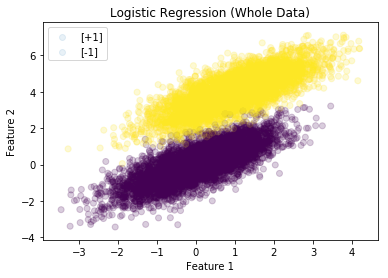

In [0]:
# Visualising the whole dataset 
plt.scatter(features[:,0],features[:,1], label='[+1]', alpha = 0.1, c = label)
plt.scatter(features[:,0],features[:,-1], alpha = 0.1, c = label, label='[-1]')
plt.title('Logistic Regression (Whole Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [0]:
# Splitting the dataset into training and testing data

df_features = pd.DataFrame(features)
df_label = pd.DataFrame(label)
df_data = pd.concat([df_label, df_features], axis = 1, ignore_index=True)
data = np.array(df_data)
np.random.shuffle(data)
label_shuffled = data[:,0]
features_shuffled = data[:, 1:]

features_train = features_shuffled[:8000]
features_test = features_shuffled[8000:]

label_train = label_shuffled[:8000]
label_test = label_shuffled[8000:]


# Without intercept

In [0]:
# Training without intercepts

weights = logistic_regression_PB(features_train, label_train, 10000, 0.001)
print("\n Weights : ", weights)

0.6920546817638881 [0.00025211 0.00101504]
0.4380817096412204 [0.07237793 0.44647166]
0.4170899691722831 [0.05320648 0.58653602]
0.4101257877470287 [0.01791344 0.66132461]
0.40621781871248747 [-0.02181887  0.70929909]
0.4034123309699214 [-0.06210842  0.7435624 ]
0.40117368602320197 [-0.10132114  0.76998018]
0.3993076242538587 [-0.13872286  0.79155985]
0.3977230941800361 [-0.1740042  0.8099679]
0.3963661966166261 [-0.20707375  0.82617462]

 Weights :  [-0.23792583  0.84075178]


In [0]:
# Testing without intercepts
predicted_labels = predicting_labels(features_test, weights)

# Finding the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
confusion__m = confusion_matrix(label_test, predicted_labels)
accuracy = accuracy_score(label_test, predicted_labels)


In [0]:
# Implementing in scikit learn without intercept

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(fit_intercept = False)
classifier.fit(features_train, label_train)

predicted_labels_sk = classifier.predict(features_test)

confusion__m_sk = confusion_matrix(label_test, predicted_labels_sk)
accuracy_sk = accuracy_score(label_test, predicted_labels_sk)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(" ========= Logistic Regression without intercept ========= ")
print("\n === LR Model from Scratch === ")
print("Optimal weights :",weights)
print("Confusion Matrix: \n", confusion__m)
print("Accuracy of model from scratch: ", accuracy)

print("\n === LR Model from Scikit Learn === ")
print("Weights from scikit learn model: ", classifier.coef_)
print("Confusion Matrix: \n", confusion__m_sk)
print("Accuracy of scikit learn model: ", accuracy_sk)


 ========= Logistic Regression without intercept ========= 

 === LR Model from Scratch === 
Optimal weights : [-0.23792583  0.84075178]
Confusion Matrix: 
 [[469 572]
 [  0 959]]
Accuracy of model from scratch:  0.714

 === LR Model from Scikit Learn === 
Weights from scikit learn model:  [[-0.68064592  1.05995992]]
Confusion Matrix: 
 [[486 555]
 [  0 959]]
Accuracy of scikit learn model:  0.7225


# With Intercept

In [0]:
# Training with intercepts
weights_with_int = logistic_regression_PB(features_train, label_train, 15000, 0.001, True)
print("\n Weights : ", weights_with_int)

0.6920546582990641 [5.12500000e-06 2.52114920e-04 1.01503888e-03]
0.41757243057161875 [-0.11271682  0.07397947  0.45536308]
0.36487402473692276 [-0.27350169  0.05720366  0.6155735 ]
0.3291173785891026 [-0.43033972  0.02396152  0.71528879]
0.30045132008363223 [-0.57686631 -0.01410844  0.79088806]
0.27655357924401325 [-0.71230164 -0.05316202  0.85424489]
0.2563005086240213 [-0.83726036 -0.09163691  0.91034899]
0.23894636752365073 [-0.95273694 -0.12887097  0.96158684]
0.2239388402021091 [-1.05977324 -0.16460613  1.0092102 ]
0.21085286566345865 [-1.15934063 -0.19877572  1.05393487]
0.19935564302745729 [-1.2523031  -0.23140463  1.09620876]
0.1891836895660196 [-1.33941301 -0.26256019  1.13633866]
0.18012643992902866 [-1.42131958 -0.29232732  1.17455257]
0.17201413949050334 [-1.49858138 -0.32079598  1.21103135]
0.16470878141474607 [-1.57167931 -0.34805483  1.24592534]

 Weights :  [-1.64096079 -0.37416264  1.27933079]


In [0]:
# Testing with intercepts
predicted_labels_int = predicting_labels(features_test, weights_with_int, True)

# Finding the confusion matrix and accuracy score
confusion__m_int = confusion_matrix(label_test, predicted_labels_int)
accuracy_int = accuracy_score(label_test, predicted_labels_int)

In [0]:
# Implementing sklearn with intercept

classifier = LogisticRegression(fit_intercept = True)
classifier.fit(features_train, label_train)

predicted_label_int_sk = classifier.predict(features_test)

confusion__m_int_sk = confusion_matrix(label_test, predicted_label_int_sk)
accuracy_int_sk = accuracy_score(label_test, predicted_label_int_sk)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(" ========= Logistic Regression with intercept ========= ")
print("\n === LR Model from Scratch === ")
print("Optimal weights :",weights_with_int)
print("Confusion Matrix: \n", confusion__m_int)
print("Accuracy of model from scratch: ", accuracy_int)

print("\n === LR Model from Scikit Learn === ")
print("Weights from scikit learn model: ", classifier.coef_)
print("Intercept from scikit learn model: ", classifier.intercept_)
print("Confusion Matrix: \n", confusion__m_int_sk)
print("Accuracy of scikit learn model: ", accuracy_int_sk)


 ========= Logistic Regression with intercept ========= 

 === LR Model from Scratch === 
Optimal weights : [-1.64096079 -0.37416264  1.27933079]
Confusion Matrix: 
 [[983  58]
 [  1 958]]
Accuracy of model from scratch:  0.9705

 === LR Model from Scikit Learn === 
Weights from scikit learn model:  [[-3.1987953   5.20373536]]
Intercept from scikit learn model:  [-8.71591651]
Confusion Matrix: 
 [[1038    3]
 [   5  954]]
Accuracy of scikit learn model:  0.996
